# Отскок от произвольно расположенных стенок

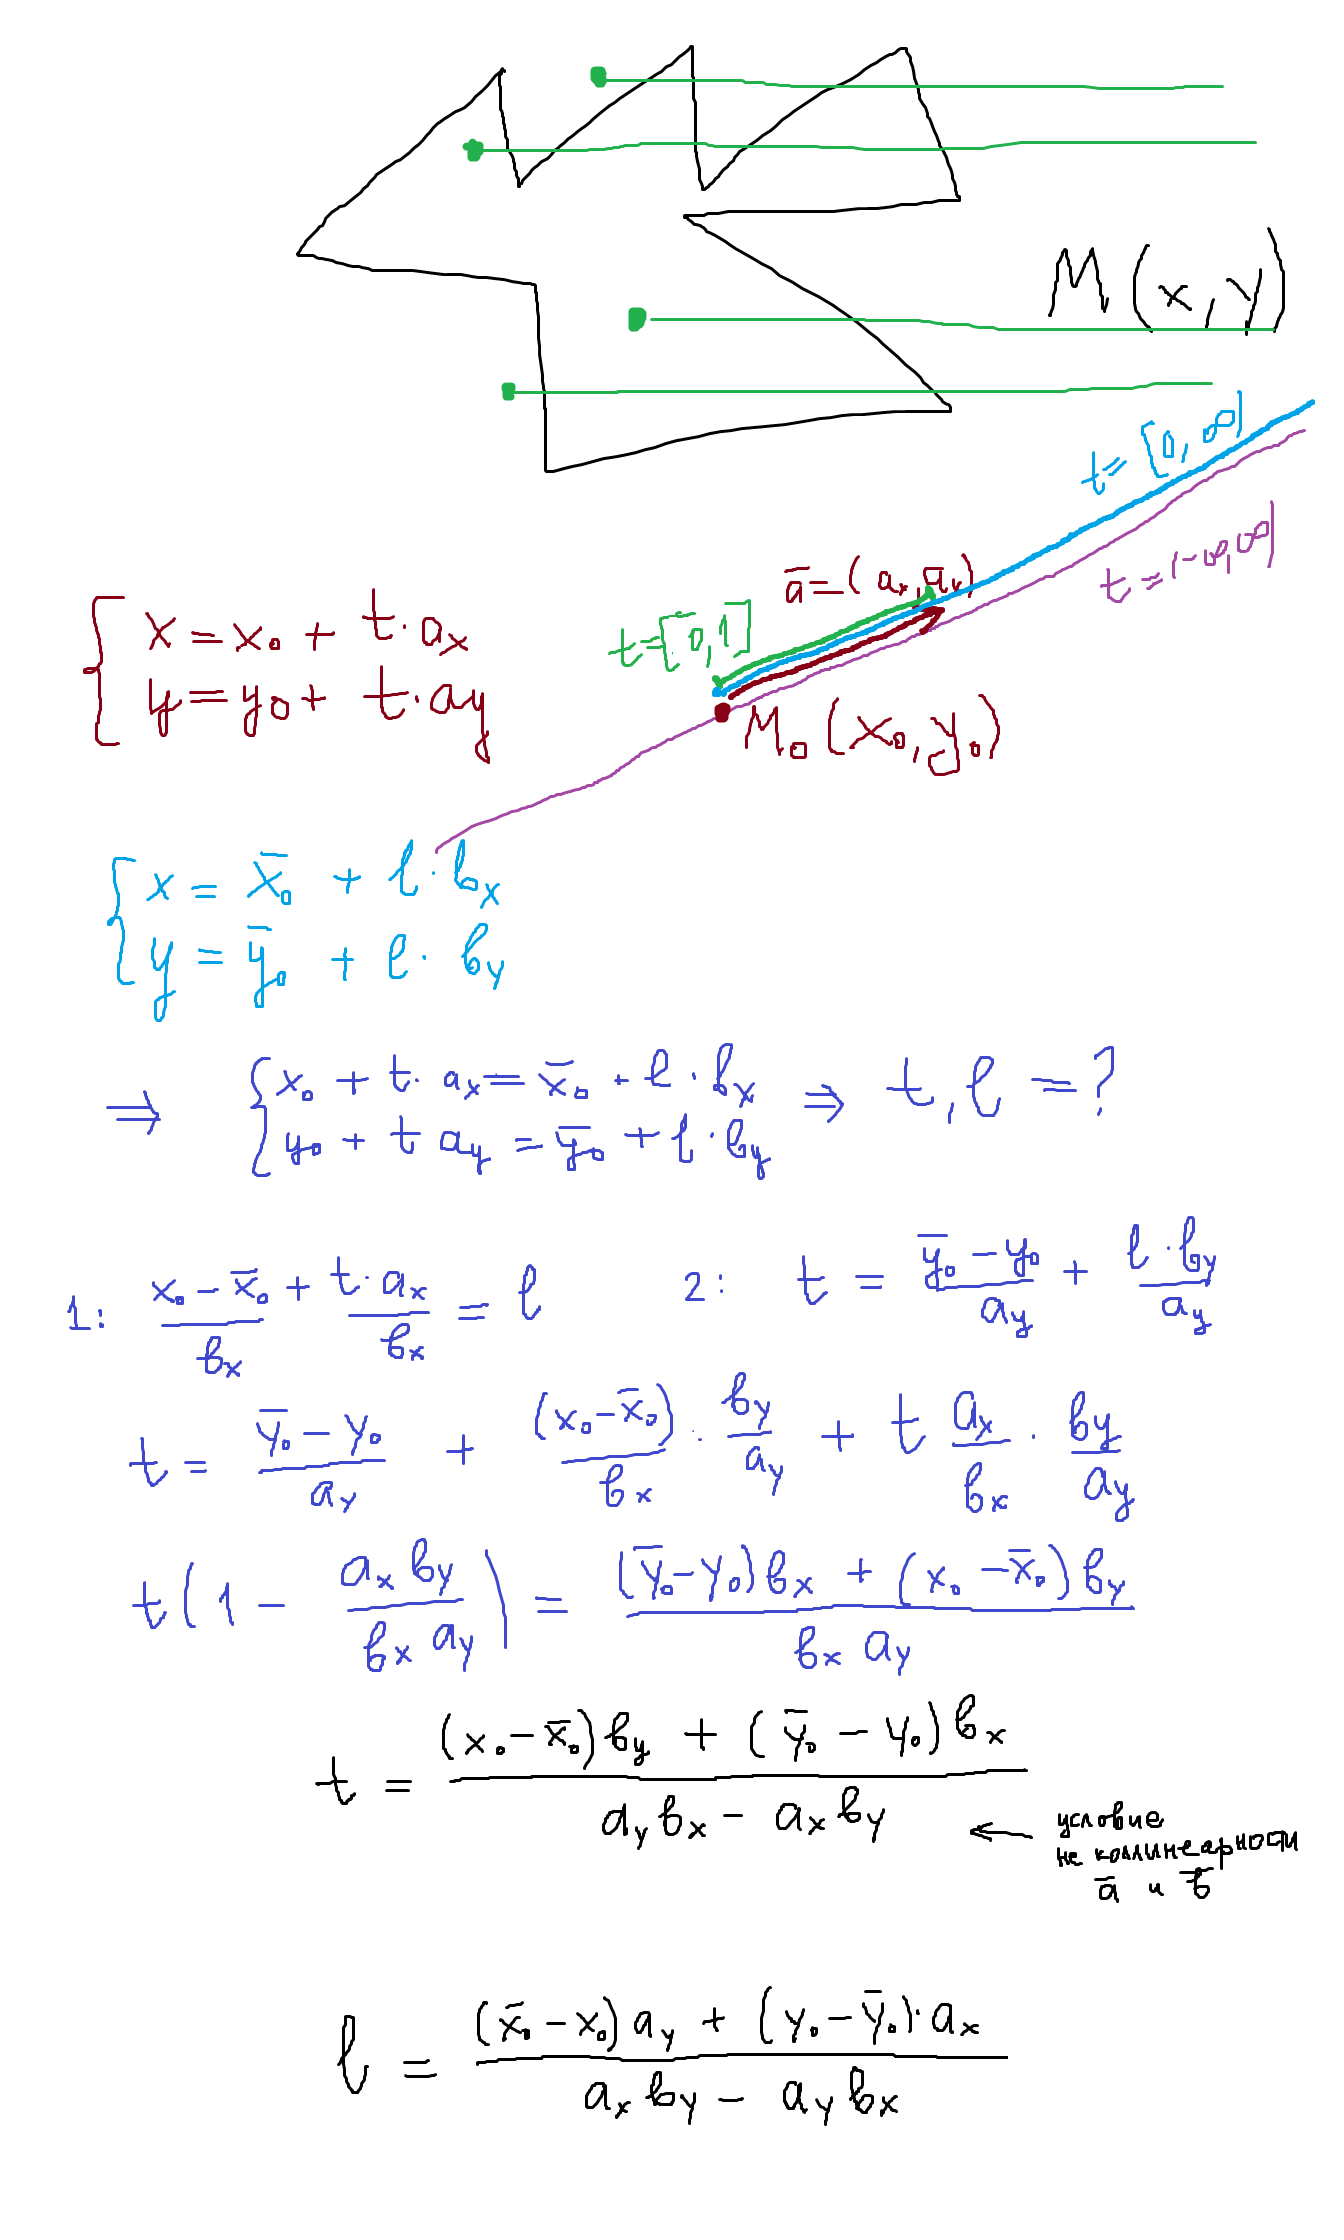

In [11]:
import random
import math

class Particle():
    
    def __init__(self, radius, mass, position, velocity):
        self.radius = radius
        self.mass = mass
        self.position = position
        self.velocity = velocity
        
    def move(self):
        
        # проверка принадлежности точки внутренней области многоугольника
        num_cross = 0
        # параметры случайного луча из положения шарика
        x0 = self.position[0]
        y0 = self.position[1]
        ax = 1
        ay = 0
        for i in range(len(sides)):
            # параметры прямой, содержащей сторону
            x0_ = polygon[i][0]
            y0_ = polygon[i][1]
            bx  = sides[i][0]
            by  = sides[i][1]
            
            if ax*by-ay*bx == 0: continue
                
            # параметр точки пересечения стороны
            l = ((x0_-x0)*ay+(y0-y0_)*ax)/(ax*by-ay*bx)
            if l >= 0 and l < 1:
                # параметр точки пересечения луча
                t = ((x0-x0_)*by+(y0_-y0)*bx)/(bx*ay-by*ax)
                if t >= 0:
                    num_cross += 1
        if num_cross%2 == 0:
            return None
            
            
    
        
        force = [0,0]
        force[0] = g[0] * self.mass + (-k) * self.velocity[0]
        force[1] = g[1] * self.mass + (-k) * self.velocity[1]
        
        self.velocity[0] += 1/self.mass * force[0] * dt
        self.velocity[1] += 1/self.mass * force[1] * dt
        
        self.position[0] += self.velocity[0] * dt
        self.position[1] += self.velocity[1] * dt
        
        # проверка столкновения с нижней стенкой
        D = height - self.position[1]
        if D < self.radius:
            self.position[1] -= (self.radius - D)
            self.velocity[1] *= -1
        # проверка столкновения с верхней стенкой
        D = self.position[1]
        if D < self.radius:
            self.position[1] += (self.radius - D)
            self.velocity[1] *= -1
        # проверка столкновения с правой стенкой
        D = width - self.position[0]
        if D < self.radius:
            self.position[0] -= (self.radius - D)
            self.velocity[0] *= -1
        # проверка столкновения с левой стенкой
        D = self.position[0]
        if D < self.radius:
            self.position[0] += (self.radius - D)
            self.velocity[0] *= -1     
        
        
    def draw(self):
        pygame.draw.circle(screen, (0,0,0), tuple(self.position), 
                           self.radius, 2)
        
def collide(p1, p2):
    R = [(i-j) for i,j in zip(p2.position,p1.position)]
    R_abs = math.sqrt(sum([i**2 for i in R]))
    R_unit = [i/R_abs for i in R]
    Delta = p1.radius + p2.radius - R_abs
    
    if Delta > 0:
        
        v1x = p1.velocity[0]
        v1y = p1.velocity[1]
        v2x = p2.velocity[0]
        v2y = p2.velocity[1]
        m1 = p1.mass
        m2 = p2.mass
        
        n = R_unit
        t = [-n[1],n[0]]       
        
        v1n =  n[0]*v1x + n[1]*v1y
        v1t = -n[1]*v1x + n[0]*v1y
        v2n =  n[0]*v2x + n[1]*v2y
        v2t = -n[1]*v2x + n[0]*v2y        
        
        v1n_ = (2*m2*v2n + (m1 - m2)*v1n) / (m1 + m2)
        v2n_ = (2*m1*v1n + (m2 - m1)*v2n) / (m2 + m1)
        
        p1.velocity[0] = n[0]*v1n_ - n[1]*v1t
        p1.velocity[1] = n[1]*v1n_ + n[0]*v1t
        p2.velocity[0] = n[0]*v2n_ - n[1]*v2t
        p2.velocity[1] = n[1]*v2n_ + n[0]*v2t         
        
        
        p1.position[0] += -(Delta/2) * R_unit[0]
        p1.position[1] += -(Delta/2) * R_unit[1]
        p2.position[0] +=  (Delta/2) * R_unit[0]
        p2.position[1] +=  (Delta/2) * R_unit[1]
        
        
#######################################################

dt = .05
my_particles = []
num = 1
g = [0, 0]
k = 0


p = Particle(10, 20,[400,200],[random.uniform(-3,3),random.uniform(-3,3)])
my_particles.append(p)


#my_particles.append(Particle(10, 10, [50,240], [5,0]))
#my_particles.append(Particle(15, 15, [700,240],[-3,0]))

#######################################################

import pygame

background_color = (255,255,0)
(width, height) = (840, 480)

screen = pygame.display.set_mode((width, height))
pygame.display.set_caption('произвольный стол')


polygon = [[10,230], [380,5], [835,220], [410,470], [200,250]]
polygon.append(polygon[0])
sides = [[polygon[i+1][0]-polygon[i][0], polygon[i+1][1]-polygon[i][1]] 
         for i in range(len(polygon)-1)]
    

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
            
    screen.fill(background_color)
    
    for i in range(len(polygon)-1):
        pygame.draw.line(screen,(255,0,0),polygon[i],polygon[i+1],5)
     
    for i in my_particles:
        i.move()
        i.draw()
    
    for i in range(num-1):
        for j in range(i+1,num):
            collide(my_particles[i], my_particles[j])  
    
    pygame.display.flip()
    
pygame.quit()